<a href="https://colab.research.google.com/github/WesleySouza13/Machine-Learnig/blob/main/ARVORE_DE_DECIS%C3%83O_87_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# manipulação

In [5]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [10]:
np.unique(df['fasting blood sugar'])

array([0, 1])

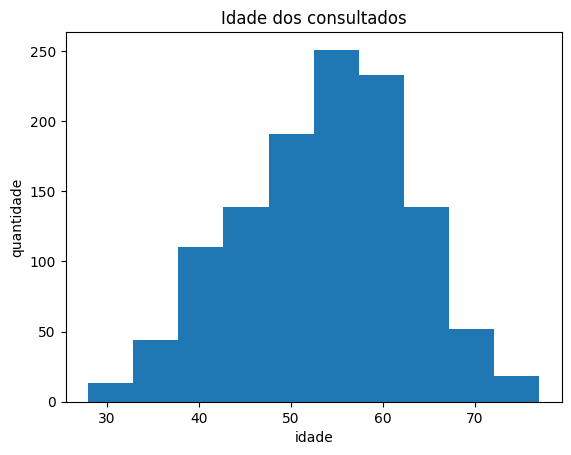

In [14]:
plt.hist(df['age'])
plt.title('Idade dos consultados')
plt.xlabel('idade')
plt.ylabel('quantidade')
plt.show()

In [20]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

# Criação de X e Y

In [16]:
x = df.drop(['target'], axis = 1)
y = df['target']

In [17]:
x

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [18]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

# treinamento  

In [24]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3)


In [26]:
x_treino.shape

(833, 11)

In [27]:
y_treino.shape

(833,)

In [28]:
x_teste.shape

(357, 11)

In [29]:
y_teste.shape

(357,)

# modelo

In [31]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [33]:
acuracia = modelo.score(x_teste, y_teste)
print('a acuracia é de:', acuracia)

a acuracia é de: 0.8739495798319328


# previsao

In [34]:
previsao = modelo.predict(x_teste)
previsao[1:5]

array([0, 0, 1, 0])

In [35]:
y_teste[1:5]

823     0
1019    0
518     1
584     0
Name: target, dtype: int64